In [288]:
from skimage.io import MultiImage
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_otsu
from skimage.morphology import binary_dilation, square
from skimage.util import img_as_ubyte
from skimage.exposure import equalize_hist

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [ ]:
# blank image and no mask -- no extracted tiles
# 3790f55cad63053e956fb73027179707

# black stripe on bottom -- no extracted tiles
# works well if i use histogram equalization or strip white blackground to black before otsu thresholding
# 741c3cea01151450aa8a04c021978b70



In [300]:
tiff_img = MultiImage('./data/train_images/554c017aec32fb7b6448c3ba22d3f0e4.tiff')

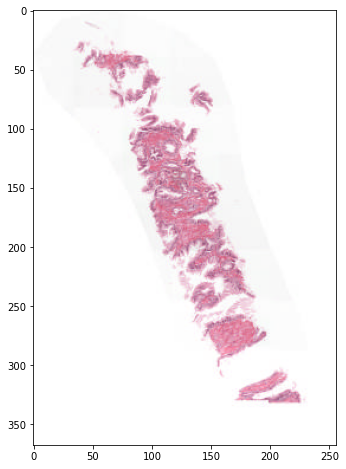

In [301]:
plt.figure(figsize=(16,8))
plt.imshow(tiff_img[2])

In [302]:
for x in tiff_img: print(x.shape)

(5888, 4096, 3)
(1472, 1024, 3)
(368, 256, 3)


In [303]:
def make_mask(img):
    gray_img = rgb2gray(img)  # NOTE -- final dim of img must be channels

    # convert back to [0, 255]
    gray_img = img_as_ubyte(gray_img)

    # Otsu's thresholding
    thresh = threshold_otsu(gray_img)
    print("otsu's thresh: ", thresh)
    mask = gray_img < thresh

    # dilation on the mask (returns bool)
    mask = binary_dilation(mask, square(5))
    
    return mask

otsu's thresh:  207


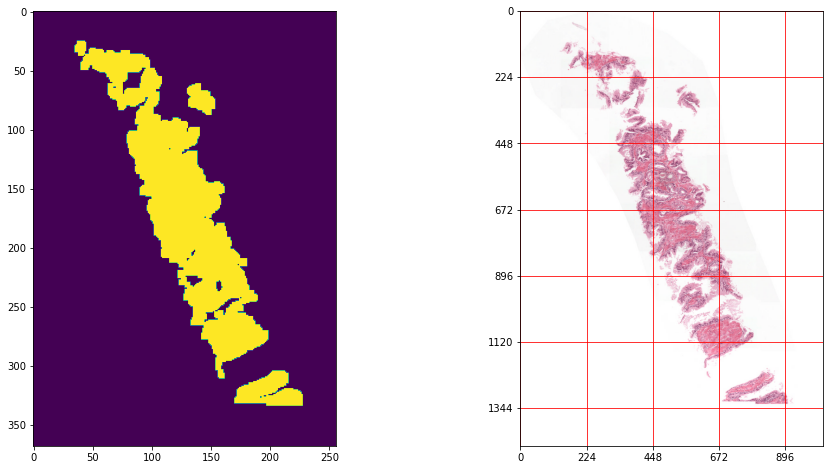

In [307]:
mask = make_mask(tiff_img[2])
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
plt.imshow(tiff_img[1])
plt.gca().xaxis.set_major_locator(MultipleLocator(224))
plt.gca().yaxis.set_major_locator(MultipleLocator(224))
plt.grid(True, 'major', color='r');

In [305]:
# number of tiles covering mask
mask.sum() / (224 * 224 / 16)

4.763392857142857

In [250]:
img = tiff_img[2]

In [236]:
img[np.all(img == 255, axis=2), :] = 0

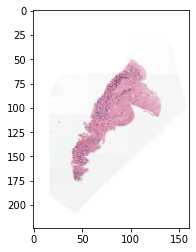

In [251]:
plt.imshow(img);

In [252]:
gray_img = img_as_ubyte(rgb2gray(img))
#gray_img = equalize_hist(gray_img)

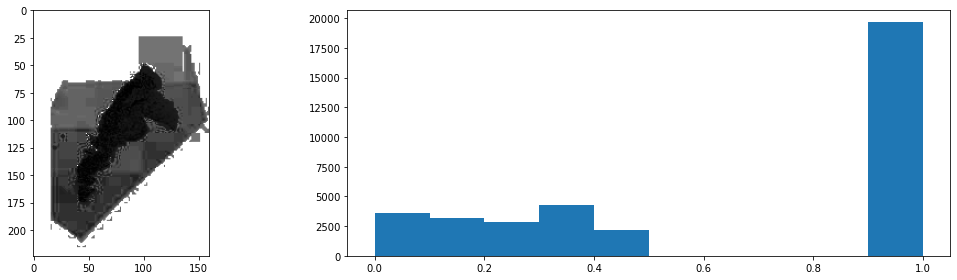

In [253]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.subplot(1,2,2)
plt.hist(gray_img.flatten())
plt.tight_layout();

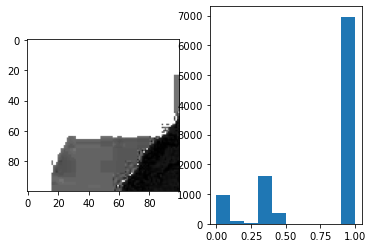

In [254]:
plt.subplot(1,2,1)
plt.imshow(gray_img[:100, :100], cmap='gray')
plt.subplot(1,2,2)
plt.hist(gray_img[:100, :100].flatten());
#plt.axvline(thresh / 100)

In [255]:
thresh = threshold_otsu(gray_img)
print(thresh)

0.4511871882847377


In [256]:
mask = gray_img > thresh

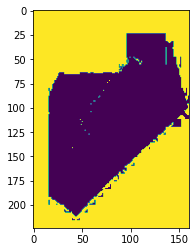

In [257]:
plt.imshow(mask);

In [244]:
mask = binary_dilation(mask, square(2))

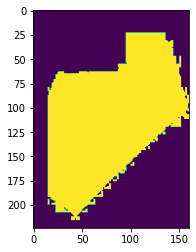

In [245]:
plt.imshow(mask);

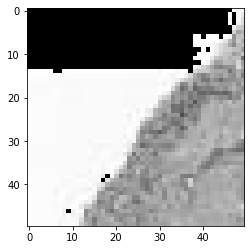

In [246]:
plt.imshow(img_as_ubyte(rgb2gray(img[50:100, 50:100])), cmap='gray')